### Ali Ataollahi - 810199461

## Q2

### Section 1 - Preprocessing

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from nltk.corpus import stopwords
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from nltk.tokenize import word_tokenize

EDA

In [2]:
with open('data/sarcasm.json', encoding="ISO-8859-1") as file:
    sarcasm_data_list = [json.loads(line.strip()) for line in file]

data = pd.DataFrame(sarcasm_data_list, columns=['is_sarcastic', 'headline', 'article_link'])
data

is_sarcastic                                           headline  \
0                 1  thirtysomething scientists unveil doomsday clo...   
1                 0  dem rep. totally nails why congress is falling...   
2                 0  eat your veggies: 9 deliciously different recipes   
3                 1  inclement weather prevents liar from getting t...   
4                 1  mother comes pretty close to using word 'strea...   
...             ...                                                ...   
28614             1       jews to celebrate rosh hashasha or something   
28615             1  internal affairs investigator disappointed con...   
28616             0  the most beautiful acceptance speech this week...   
28617             1  mars probe destroyed by orbiting spielberg-gat...   
28618             1                 dad clarifies this not a food stop   

                                            article_link  
0      https://www.theonion.com/thirtysomething-scien...  
1      https://www.huffingtonpost.com/entry/donna-edw...  
2      https://www.huffingtonpost.com/entry/eat-your-...  
3      https://local.theonion.com/inclement-weather-p...  
4      https://www.theonion.com/mother-comes-pretty-c...  
...                                                  ...  
28614  https://www.theonion.com/jews-to-celebrate-ros...  
28615  https://local.theonion.com/internal-affairs-in...  
28616  https://www.huffingtonpost.com/entry/andrew-ah...  
28617  https://www.theonion.com/mars-probe-destroyed-...  
28618  https://www.theonion.com/dad-clarifies-this-no...  

[28619 rows x 3 columns]

For showing distribution of labels in the dataset we use bar-plot.

<Axes: xlabel='is_sarcastic', ylabel='count'>

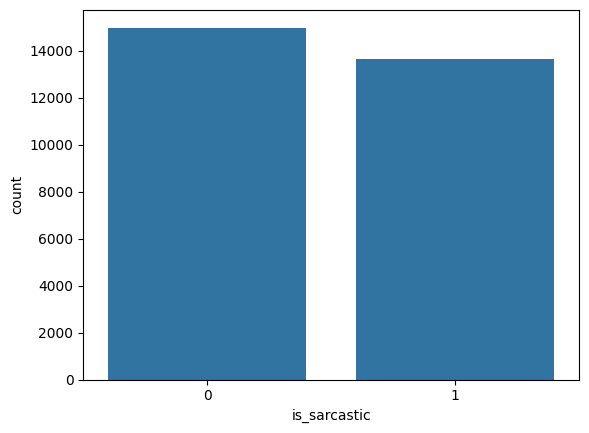

In [3]:
sns.countplot(x='is_sarcastic', data=data)

Now we do preprocessing.

In [4]:
data['headline'].isnull().values.any()

False

In [5]:
# Create a boolean mask to identify rows where the text column is just spaces
mask_empty = data['headline'].str.strip() == ''

# Drop rows where the text column is just spaces
data = data[~mask_empty]

data.drop(columns=['article_link'], inplace=True)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ali18\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def clean_headline_text(text_str):
    text_str = re.sub('[^a-zA-Z]', ' ', text_str)
    text_str = text_str.lower()
    text_str = text_str.split(' ')
    text_str = [w for w in text_str if not w in set(stopwords.words('english'))]
    text_str = ' '.join(text_str)
    return text_str

data['headline'] = data['headline'].apply(lambda x: clean_headline_text(x))
data.head()

is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep  totally nails congress falling short ...
2             0       eat veggies    deliciously different recipes
3             1       inclement weather prevents liar getting work
4             1  mother comes pretty close using word  streamin...

### Section 2 -  Load Glove

In [8]:
embeddings_dict = {}
file = open('data/glove.6B.100d.txt', encoding='utf-8')
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dict[word] = coefs
file.close()

print('Found %s word vectors.' % len(embeddings_dict))

Found 400000 word vectors.


In [9]:
import pickle
pickle.dump({'embeddings_dict': embeddings_dict}, open('glove_embedding', 'wb'))

In [10]:
len(embeddings_dict['queen'])

100

Downloads the 'punkt' data package, which contains pre-trained models for tokenizing text.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ali18\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenize the given text data and compute GloVe embeddings for each word in the text. Calculate the average GloVe embedding for each text.

In [12]:
tokenized_sentences_list = []

for index, sent in data.iterrows():
    x = [i.lower() for i in word_tokenize(sent['headline']) if i.isalpha()]
    tokenized_sentences_list.append(x)

def compute_embedding_glove(sentence_list):
    vectors_list = []
    for word in sentence_list:
        try:
            word_vec = embeddings_dict[word]
            vectors_list.append(word_vec)
        except:
            continue
    return np.mean(vectors_list, axis=0)

embedded_headlines_list = []

for sent in tokenized_sentences_list:
    vec = compute_embedding_glove(sent)
    if isinstance(vec, np.float64):
        vec = np.zeros(100)
    embedded_headlines_list.append(vec)

embedded_headlines_list

C:\Users\ali18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ali18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[array([ 2.12443128e-01,  1.79047868e-01,  3.13938558e-01, -1.69291422e-01,
        -3.32162589e-01, -1.81076840e-01,  1.03894576e-01,  8.15801024e-02,
        -4.73433733e-01,  1.39785141e-01, -8.96763355e-02,  1.68562442e-01,
         1.51358575e-01,  8.37274929e-05,  1.95334300e-01,  1.24192856e-01,
         3.79818715e-02,  3.08192998e-01,  4.53857426e-03, -1.21196426e-01,
        -7.30385706e-02, -1.31902710e-01, -3.37389290e-01,  2.42427411e-03,
         4.65359986e-01,  9.85327139e-02,  5.30764274e-02,  1.38531774e-01,
        -1.20617136e-01, -6.08661510e-02,  1.08217426e-01, -4.50531505e-02,
        -2.66792834e-01,  8.27063471e-02, -2.76184976e-01, -2.16990709e-01,
        -3.80472839e-01, -2.28540584e-01,  2.43548304e-01, -7.02154413e-02,
        -2.01957434e-01, -4.80902791e-02, -2.30633140e-01, -1.25626847e-01,
        -2.02214271e-01, -1.57611012e-01,  8.55408534e-02,  1.92517608e-01,
        -1.87686428e-01, -3.39811474e-01,  1.04071438e-01, -2.62891024e-01,
         1.6

In [13]:
X = np.array(embedded_headlines_list)
X.shape

(28619, 100)

In [14]:
y = data['is_sarcastic']
y

0        1
1        0
2        0
3        1
4        1
        ..
28614    1
28615    1
28616    0
28617    1
28618    1
Name: is_sarcastic, Length: 28619, dtype: int64

Convert categorical labels into numerical values to prepare them for logistic regression analysis.

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = np.reshape(y_encoded, (-1, 1))

print(y[:5])
print(y_encoded[:5])

0    1
1    0
2    0
3    1
4    1
Name: is_sarcastic, dtype: int64
[[1]
 [0]
 [0]
 [1]
 [1]]


### Section 3 - Training

Split the data into training and testing sets with an 80/20 ratio using the train_test_split function from scikit-learn. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, shuffle=True, test_size=0.2, random_state=60)

Train a Logistic Regression classifier using the GloVe vectors from the training set. 

In [17]:
log_reg_model = LogisticRegression()
log_reg_model


LogisticRegression()

In [18]:
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\ali18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3021
           1       0.70      0.68      0.69      2703

    accuracy                           0.71      5724
   macro avg       0.71      0.71      0.71      5724
weighted avg       0.71      0.71      0.71      5724



Now we plot confusion matrix.

In [19]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[2232  871]
 [ 789 1832]]


## Q3

###  Section 1

Load Data

In [20]:
# read in the extracted text file      
with open('data/advs.txt', "r") as file:
    text = file.read()

# print out the first 100 characters
print(text[:100])





                        THE ADVENTURES OF SHERLOCK HOLMES

                               Arthur


Preprocesing

In [21]:
import re
from collections import Counter

def preprocess(text):
    # Convert text to lowercase
    text = text.lower()

    # Define a dictionary of punctuation replacements
    punctuation_replacements = {
        r"\.": " <PERIOD> ",
        r",": " <COMMA> ",
        r'"': " <QUOTATION_MARK> ",
        r";": " <SEMICOLON> ",
        r"!": " <EXCLAMATION_MARK> ",
        r"\?": " <QUESTION_MARK> ",
        r"\(": " <LEFT_PAREN> ",
        r"\)": " <RIGHT_PAREN> ",
        r"--": " <HYPHENS> ",
        r":": " <COLON> "
    }

    # Replace punctuation with tokens using regular expressions
    for pattern, replacement in punctuation_replacements.items():
        text = re.sub(pattern, replacement, text)

    # Split the text into words
    words = text.split()

    return words


words = preprocess(text)
print(words[:30])
print(f"Number of words in the text: {len(words)}")
print(f"Number of unique words: {len(set(words))}")  # Using a `set` to remove duplicates

['the', 'adventures', 'of', 'sherlock', 'holmes', 'arthur', 'conan', 'doyle', 'table', 'of', 'contents', 'a', 'scandal', 'in', 'bohemia', 'the', 'red-headed', 'league', 'a', 'case', 'of', 'identity', 'the', 'boscombe', 'valley', 'mystery', 'the', 'five', 'orange', 'pips']
Number of words in the text: 125588
Number of unique words: 8508


Skip-gram

In [22]:
from collections import Counter

def create_lookup_tables(words):
    word_counts = Counter(words)
    sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
    int_to_vocab = {ii: word for ii, word in enumerate(sorted_vocab)}
    vocab_to_int = {word: ii for ii, word in int_to_vocab.items()}
    return vocab_to_int, int_to_vocab

def convert_words_to_ints(words, vocab_to_int):
    return [vocab_to_int[word] for word in words]

vocab_to_int, int_to_vocab = create_lookup_tables(words)
int_words = convert_words_to_ints(words, vocab_to_int)

print(int_words[:30])

[2, 1533, 7, 133, 37, 639, 4508, 4509, 263, 7, 1534, 8, 815, 9, 861, 2, 533, 640, 8, 120, 7, 2048, 2, 666, 1345, 489, 2, 317, 935, 862]


In [23]:
from collections import Counter
import random
import numpy as np

threshold = 1e-5
word_counts = Counter(int_words)
#print(list(word_counts.items())[0])  # dictionary of int_words, how many times they appear

total_count = len(int_words)
freqs = {word: count/total_count for word, count in word_counts.items()}
p_drop = {word: 1 - np.sqrt(threshold/freqs[word]) for word in word_counts}
# discard some frequent words, according to the subsampling equation
# create a new list of words for training
train_words = [word for word in int_words if random.random() < (1 - p_drop[word])]

print(train_words[:30])

[1533, 4508, 4509, 1534, 2048, 2, 2, 1760, 751, 3159, 752, 1222, 570, 570, 864, 861, 263, 1534, 2459, 3161, 1535, 3162, 4510, 4511, 4512, 2460, 668, 4513, 1536, 4514]


In [24]:
def get_target(words, idx, window_size=2):
    ''' Get a list of words in a window around an index. '''
    
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = words[start:idx] + words[idx+1:stop+1]
    
    return list(target_words)

int_text = [i for i in range(10)]
print('Input: ', int_text)
idx=5 # word index of interest

target = get_target(int_text, idx=idx, window_size=2)
print('Target: ', target)  # you should get some indices around the idx

Input:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Target:  [3, 4, 6, 7]


Generating Word Batches for a Skip-gram Model.

In [25]:
def get_batches(words, batch_size, window_size=2):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y

int_text = [i for i in range(20)]
x,y = next(get_batches(int_text, batch_size=4, window_size=2))

print('x\n', x)
print('y\n', y)

x
 [0, 0, 1, 1, 1, 2, 2, 2, 3, 3]
y
 [1, 2, 0, 2, 3, 0, 1, 3, 1, 2]


Calculates the cosine similarity.

In [26]:
def cosine_similarity(embedding, valid_size=16, valid_window=100, device='cpu'):
    """ Returns the cosine similarity of validation words with words in the embedding matrix.
        Here, embedding should be a PyTorch embedding module.
    """

    # Here we're calculating the cosine similarity between some random words and
    # our embedding vectors. With the similarities, we can look at what words are
    # close to our random words.
    # sim = (a . b) / |a||b|
    embedding_vectors = embedding.weight

    # Magnitude of embedding vectors, |b|
    magnitudes = embedding_vectors.pow(2).sum(dim=1).sqrt().unsqueeze(0)

    # Pick N words from our ranges (0,window) and (1000,1000+window). Lower id implies more frequent
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples,
                               random.sample(range(1000,1000+valid_window), valid_size//2))
    valid_examples = torch.LongTensor(valid_examples).to(device)
    valid_vectors = embedding(valid_examples)
    similarities = torch.mm(valid_vectors, embedding_vectors.t())/magnitudes

    return valid_examples, similarities

Word Embedding with Skip-Gram Negative Sampling Model.

In [27]:
import torch
from torch import nn
import torch.optim as optim

class NegativeSamplingModel(nn.Module):
    def __init__(self, vocab_size, embedding_size, noise_dist=None):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        self.noise_dist = noise_dist

        # Define embedding layers for input and output words
        self.input_embedding = nn.Embedding(vocab_size, embedding_size)
        self.output_embedding = nn.Embedding(vocab_size, embedding_size)

        # Initialize embedding tables with uniform distribution
        # This helps with convergence
        self.input_embedding.weight.data.uniform_(-1, 1)
        self.output_embedding.weight.data.uniform_(-1, 1)

    def forward_input(self, input_words):
        input_vectors = self.input_embedding(input_words)
        return input_vectors

    def forward_output(self, output_words):
        output_vectors = self.output_embedding(output_words)
        return output_vectors

    def forward_noise(self, batch_size, num_samples):
        """ Generate noise vectors with shape (batch_size, num_samples, embedding_size)"""
        if self.noise_dist is None:
            # Sample words uniformly
            noise_dist = torch.ones(self.vocab_size)
        else:
            noise_dist = self.noise_dist

        # Sample words from our noise distribution
        noise_words = torch.multinomial(noise_dist,
                                        batch_size * num_samples,
                                        replacement=True)
        device = "cuda" if model.output_embedding.weight.is_cuda else "cpu"
        noise_words = noise_words.to(device)
        noise_vectors = self.output_embedding(noise_words).view(batch_size, num_samples, self.embedding_size)
        return noise_vectors

Negative Sampling Loss Module for Skip-Gram Model.

In [28]:
class NegativeSamplingLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input_vectors, output_vectors, noise_vectors):
        
        batch_size, embed_size = input_vectors.shape
        
        # Input vectors should be a batch of column vectors
        input_vectors = input_vectors.view(batch_size, embed_size, 1)
        
        # Output vectors should be a batch of row vectors
        output_vectors = output_vectors.view(batch_size, 1, embed_size)
        
        # bmm = batch matrix multiplication
        # correct log-sigmoid loss
        out_loss = torch.bmm(output_vectors, input_vectors).sigmoid().log()
        out_loss = out_loss.squeeze()
        
        # incorrect log-sigmoid loss
        noise_loss = torch.bmm(noise_vectors.neg(), input_vectors).sigmoid().log()
        noise_loss = noise_loss.squeeze().sum(1)  # sum the losses over the sample of noise vectors

        # negate and sum correct and noisy log-sigmoid losses
        # return average batch loss
        return -(out_loss + noise_loss).mean()

Training Word Embeddings using Skip-Gram with Negative Sampling in PyTorch.

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Get our noise distribution
# Using word frequencies calculated earlier
word_frequencies = np.array(sorted(freqs.values(), reverse=True))
unigram_dist = word_frequencies/word_frequencies.sum()
noise_dist = torch.from_numpy(unigram_dist**(0.75)/np.sum(unigram_dist**(0.75)))

# Instantiate the model
embedding_dim = 100
model = NegativeSamplingModel(len(vocab_to_int), embedding_dim, noise_dist=noise_dist).to(device)

# Using the loss function we defined
loss_fn = NegativeSamplingLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

print_every = 200
steps = 0
epochs = 25

# Train for some number of epochs
for epoch in range(epochs):
    # Get our input and target batches
    for input_words, target_words in get_batches(train_words, 512):
        steps += 1
        inputs, targets = torch.LongTensor(input_words), torch.LongTensor(target_words)
        inputs, targets = inputs.to(device), targets.to(device)

        # Input, output, and noise vectors
        input_vectors = model.forward_input(inputs)
        output_vectors = model.forward_output(targets)
        noise_vectors = model.forward_noise(inputs.shape[0], 4)

        # Negative sampling loss
        loss = loss_fn(input_vectors, output_vectors, noise_vectors)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Loss statistics
        if steps % print_every == 0:
            print(f"Epoch: {epoch+1}/{epochs}")
            print(f"Loss: {loss.item()}") # Average batch loss at this point in training

            valid_examples, valid_similarities = cosine_similarity(model.input_embedding, device=device)
            _, closest_idxs = valid_similarities.topk(6)
            valid_examples, closest_idxs = valid_examples.to('cpu'), closest_idxs.to('cpu')

            for i, valid_idx in enumerate(valid_examples):
                closest_words = [int_to_vocab[idx.item()] for idx in closest_idxs[i]][1:]
                print(f"{int_to_vocab[valid_idx.item()]} | {', '.join(closest_words)}")
            print("...\n")

Epoch: 6/25
Loss: 5.983024597167969
if | strangest, abode, resentment, sound, severed
all | children, repaid, jail, overpowering, sought
<QUOTATION_MARK> | heads, readers, eggs, soldier, brains
he | 'some, our, slashed, border, sutherland's
were | doors, firmness, snakish, inquirer, left-hand
in | irene, incarnate, mccauley, far-gone, horrify
our | although, he, urgency, pride, hit
him | assistants, that, fled, presents, averse
data | arthur, puzzling, delicate, eustace, false
solution | aloud, blue, chalk-pit, fulfilled, standi
'well | receive, crumbly, grosvenor, bustling, youth
intention | rambling, tenant, piping, turns, address
soul | villain, roofs, frantically, throughout, jowl
bar | miners', border, bachelor, harm, disturbing
knees | then, retained, pretended, showed, sign
grounds | shuddered, withdraw, wandering, voraciously, scaffolding
...

Epoch: 11/25
Loss: 4.536405086517334
or | superb, move, guess, sailing, tired
about | balancing, 'jumping, re-marriage, roar, chairs
of 

Combining embedding and Context Weights.

In [35]:
embeddings = model.input_embedding.weight.to('cpu').data.numpy() + model.output_embedding.weight.to('cpu').data.numpy()

###  Section 2

In [36]:
import numpy as np
from scipy.spatial.distance import cosine

# Assume we have the embeddings array from the previous code
# embeddings = model.in_embed.weight.to('cpu').data.numpy() + model.out_embed.weight.to('cpu').data.numpy()

# Define a function to find the index of a word in the embeddings
def find_word_index(word, vocab_list):
    """
    Finds the index of a word in the vocabulary list.
    
    Args:
        word (str): The word to find.
        vocab_list (list): The list of vocabulary.

    Returns:
        int: The index of the word in the vocabulary list.
    """
    return vocab_list.index(word)

# Example vocabulary
vocabulary_list = ['king', 'man', 'woman', 'queen', 'book', 'computer', ...]

# Find the embedding vectors for 'king', 'man', 'woman', and 'queen'
king_idx = find_word_index('king', vocabulary_list)
man_idx = find_word_index('man', vocabulary_list)
woman_idx = find_word_index('woman', vocabulary_list)
queen_idx = find_word_index('queen', vocabulary_list)

king_vector = embeddings[king_idx]
man_vector = embeddings[man_idx]
woman_vector = embeddings[woman_idx]
queen_vector = embeddings[queen_idx]

# Compute the analogy vector
analogy_vector = king_vector - man_vector + woman_vector

# Calculate the cosine similarity between the analogy vector and the queen vector
similarity_score = 1 - cosine(analogy_vector, queen_vector)

print(f"Similarity between 'king - man + woman' and 'queen': {similarity_score}")


Similarity between 'king - man + woman' and 'queen': 0.21886204183101654


###  Section 3

Principal Component Analysis (PCA) for visualizing word embeddings.

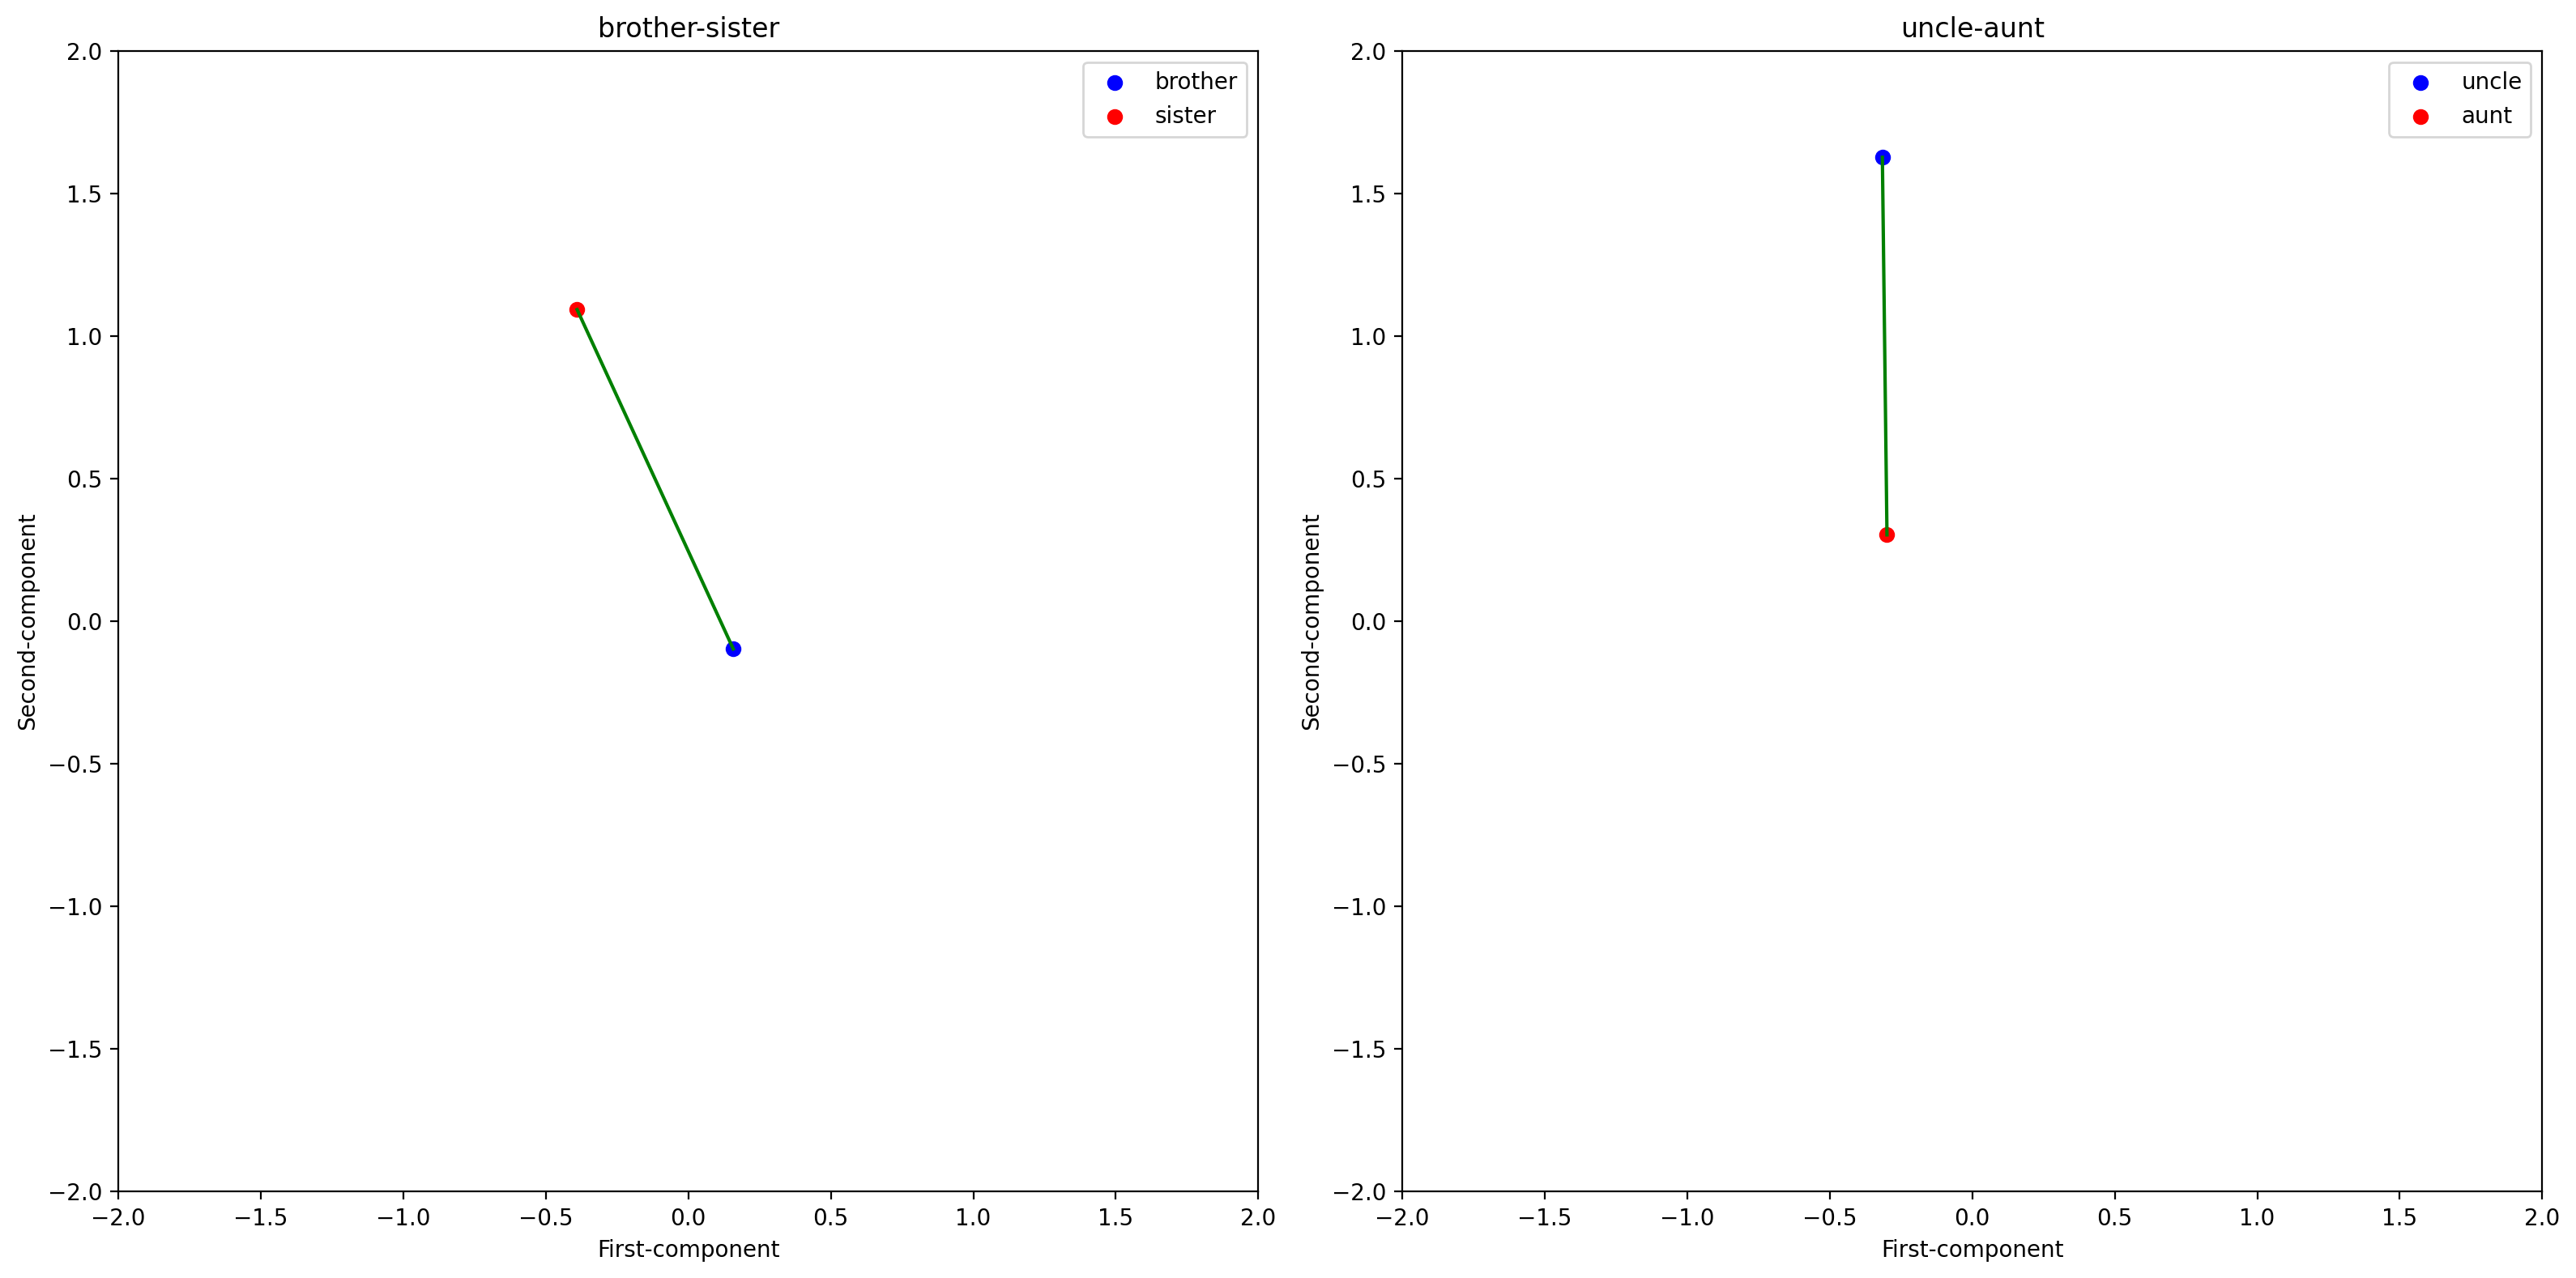

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca_model = PCA(n_components=2)

# Fit the word vectors to the PCA object
word_vectors_pca = pca_model.fit_transform(embeddings)

# Create a dictionary of the four vector pairs
word_pairs = {'brother-sister': ('brother', 'sister'), 
              'uncle-aunt': ('uncle', 'aunt')}

# Create four subplots, each on a separate row
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Create a plot for each vector pair
for i, (pair_name, (word1, word2)) in enumerate(word_pairs.items()):
    # Find the vector difference
    if word1 in vocab_to_int and word2 in vocab_to_int:
        vector_difference = embeddings[vocab_to_int[word1]] - embeddings[vocab_to_int[word2]]
        
        # Transform the difference vector to 2D using PCA
        diff_pca = pca_model.transform(vector_difference.reshape(1, -1))
        
        # Scatter plot the word vectors
        
        # Plot the two words with different colors
        word1_index, word2_index = vocab_to_int[word1], vocab_to_int[word2]
        axes[i].scatter(word_vectors_pca[word1_index, 0], word_vectors_pca[word1_index, 1], color='blue', label=word1)
        axes[i].scatter(word_vectors_pca[word2_index, 0], word_vectors_pca[word2_index, 1], color='red', label=word2)
        
        # Plot the vector difference
        axes[i].plot([word_vectors_pca[word1_index, 0], word_vectors_pca[word2_index, 0]], [word_vectors_pca[word1_index, 1], word_vectors_pca[word2_index, 1]], color='green')
        
        # Set limits of x and y axes to the same values for all subplots
        xlim = (-2, 2)
        ylim = (-2, 2)
        axes[i].set_xlim(xlim)
        axes[i].set_ylim(ylim)
        
        # Add labels and title
        axes[i].set_xlabel('First-component')
        axes[i].set_ylabel('Second-component')
        axes[i].set_title(pair_name)
        axes[i].legend()

plt.tight_layout()
plt.show()


Visualized words.

8508


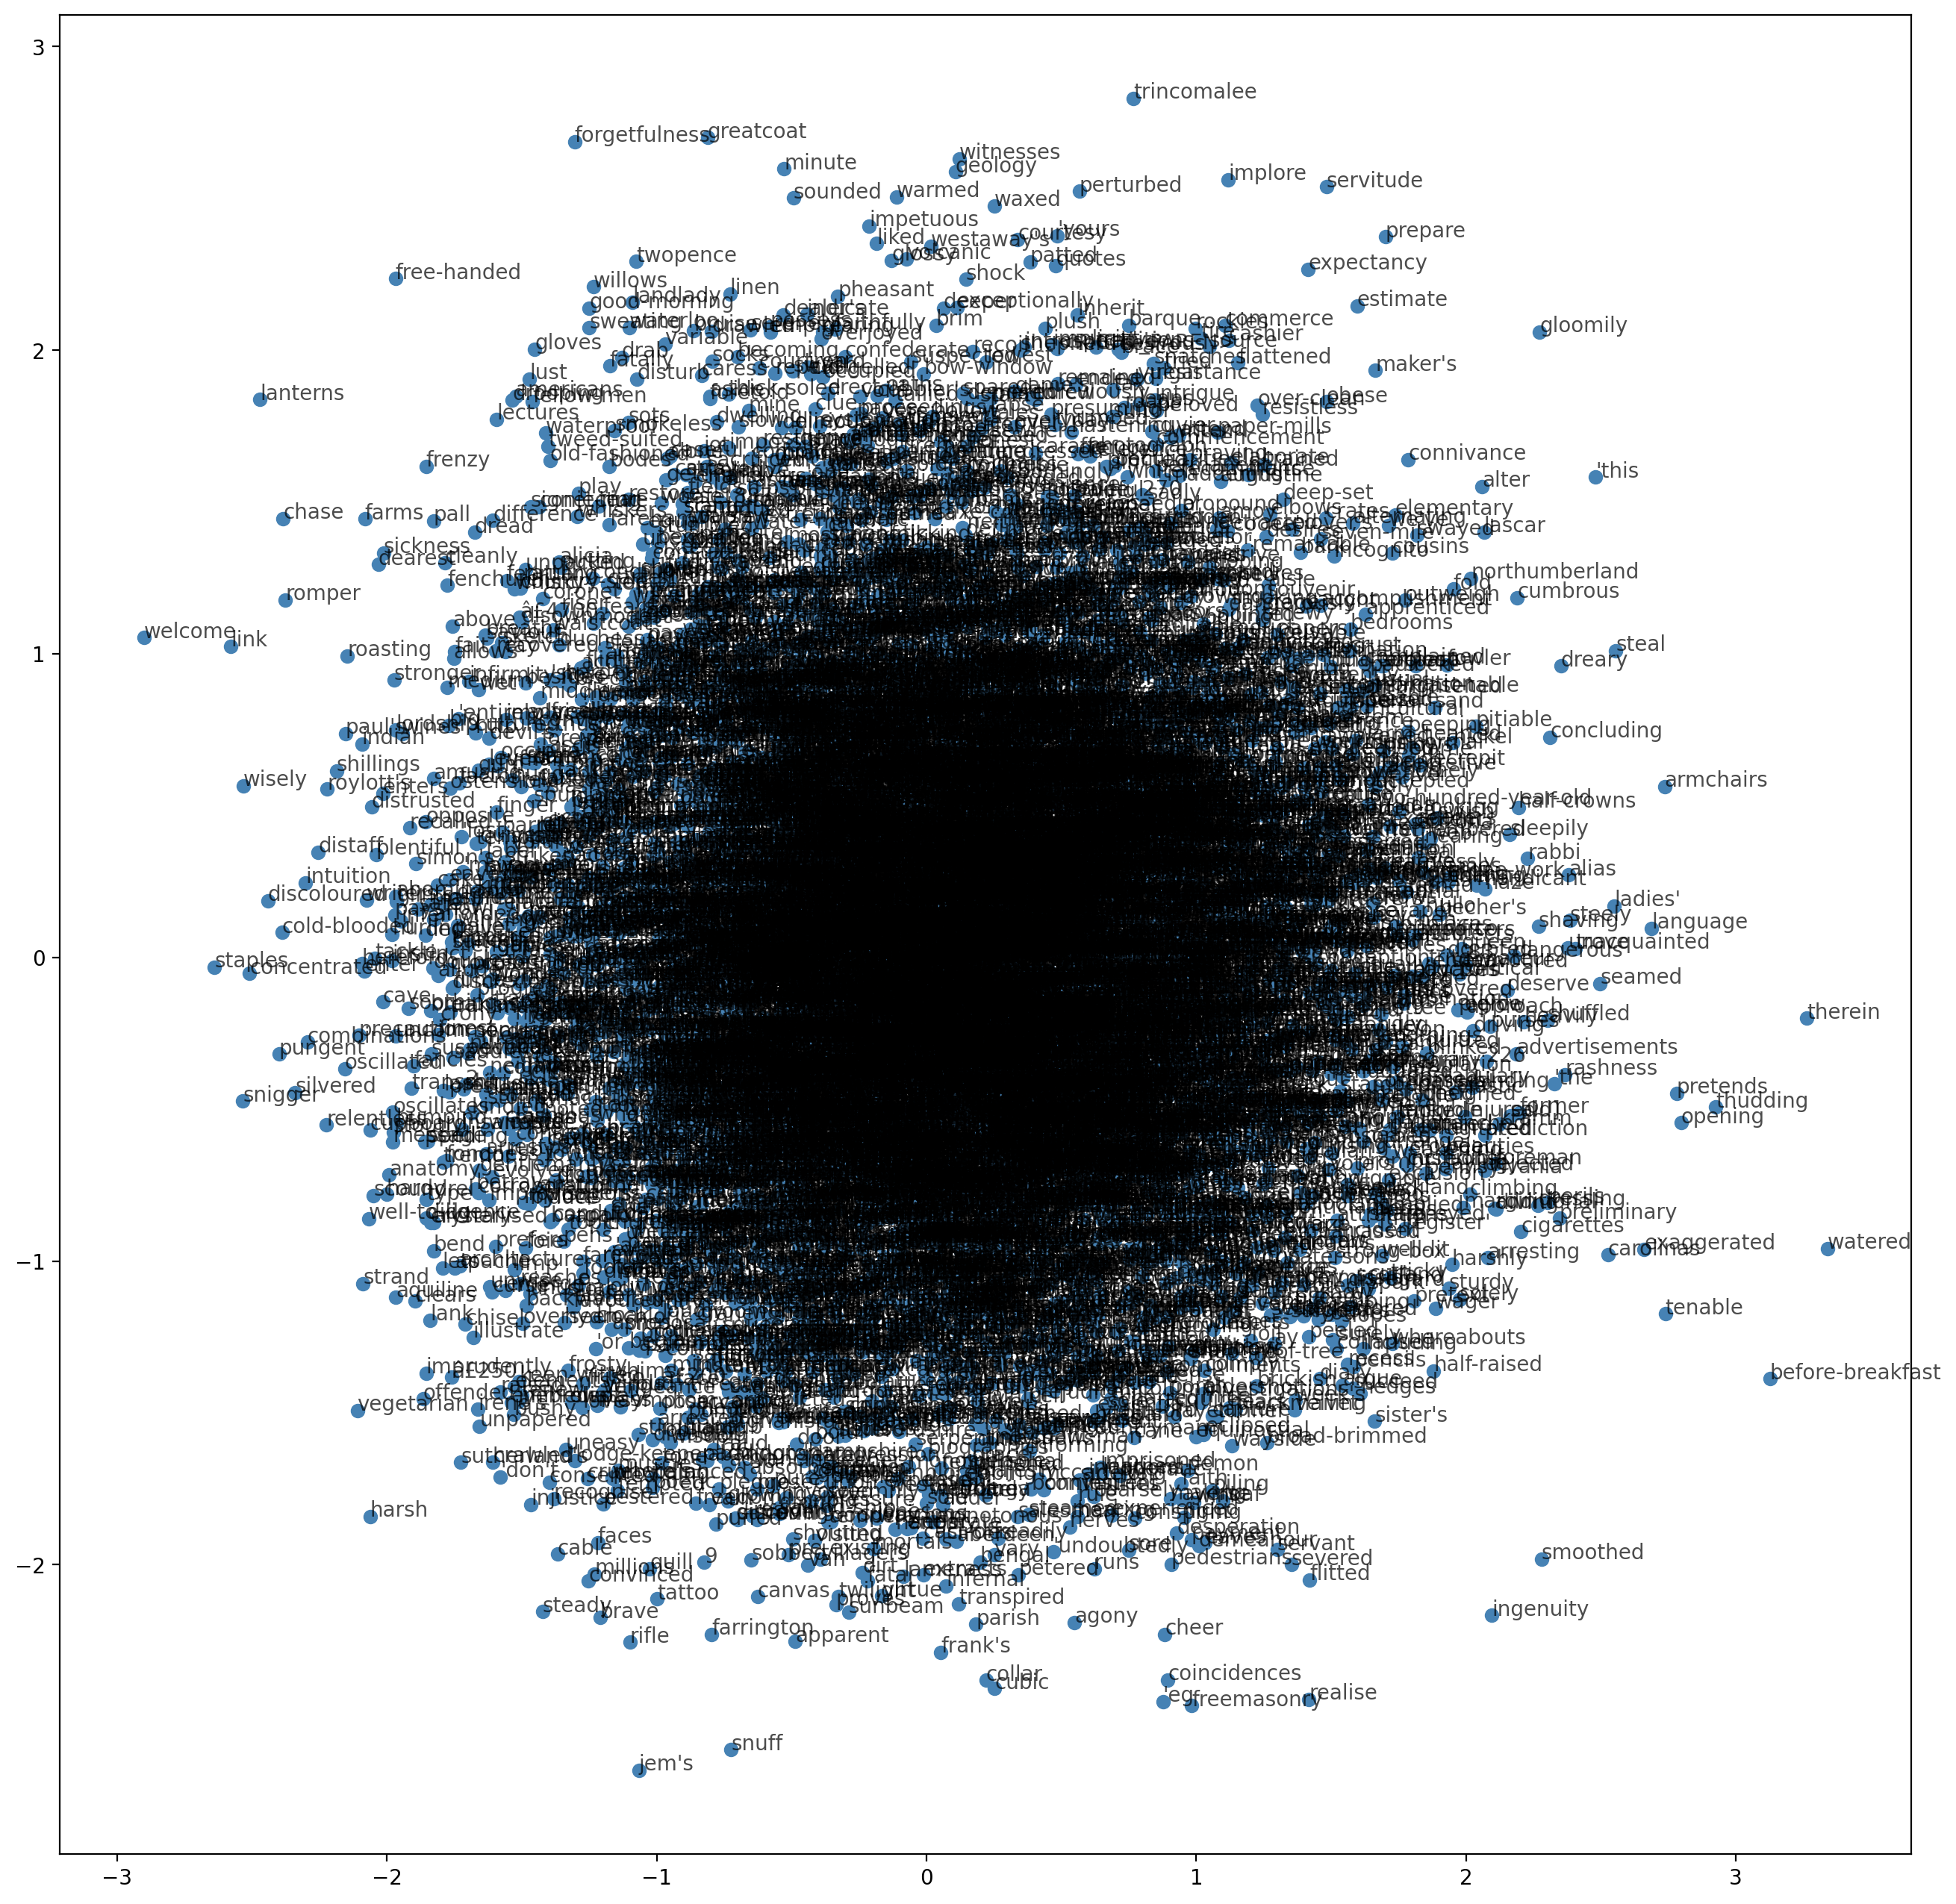

In [38]:
# Create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(16, 16))

# Print the number of embeddings
print(len(embeddings))

# Scatter plot each word vector
for index in range(len(embeddings)):
    plt.scatter(*word_vectors_pca[index, :], color='steelblue')  # Scatter plot the word vector
    plt.annotate(int_to_vocab[index], (word_vectors_pca[index, 0], word_vectors_pca[index, 1]), alpha=0.7)  # Annotate each point with its corresponding word

# Display the plot
plt.show()
